In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('impds_mar_2024.csv')
df

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,3,2024,10,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,3,2024,38,JAMMU AND KASHMIR,HARYANA
2,7,1,3,2024,3,JAMMU AND KASHMIR,DELHI
3,8,1,3,2024,2,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,3,2024,1231,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
318,27,38,3,2024,506,Dadar & Nagar Haveli & Daman & Diu,MAHARASHTRA
319,28,38,3,2024,1,Dadar & Nagar Haveli & Daman & Diu,ANDHRA PRADESH
320,29,38,3,2024,3,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
321,32,38,3,2024,5,Dadar & Nagar Haveli & Daman & Diu,KERALA


In [3]:
df.describe()

,homestatecode,salestatecode,month,year,txn_count
count,323.000000,323.000000,323.0,323.0,323.000000
mean,16.879257,20.021672,3.0,2024.0,1795.151703
std,9.553753,12.091120,0.0,0.0,13979.520169
min,1.000000,1.000000,3.0,2024.0,1.000000
25%,8.000000,7.000000,3.0,2024.0,3.000000
50%,19.000000,23.000000,3.0,2024.0,14.000000
75%,23.500000,30.000000,3.0,2024.0,148.000000
max,36.000000,38.000000,3.0,2024.0,178586.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   homestatecode  323 non-null    int64 
 1   salestatecode  323 non-null    int64 
 2   month          323 non-null    int64 
 3   year           323 non-null    int64 
 4   txn_count      323 non-null    int64 
 5   salestatename  323 non-null    object
 6   homestatename  323 non-null    object
dtypes: int64(5), object(2)
memory usage: 17.8+ KB


In [5]:
print(df.isnull().sum()) 


homestatecode    0
salestatecode    0
month            0
year             0
txn_count        0
salestatename    0
homestatename    0
dtype: int64


In [6]:
print("\nUnique Home States:", df['homestatename'].nunique())


Unique Home States: 23


In [7]:
print("Unique Sale States:", df['salestatename'].nunique())

Unique Sale States: 28


In [8]:
top_states = df.groupby('homestatename')['txn_count'].sum().nlargest(5)

In [9]:
print("\nTop 5 States by Transaction Count:\n", top_states)


Top 5 States by Transaction Count:
 homestatename
UTTAR PRADESH     264087
BIHAR             245021
MADHYA PRADESH     29792
HARYANA            10557
UTTARAKHAND         6293
Name: txn_count, dtype: int64


# Filter transactions where home state is 'DELHI'



In [10]:
delhi_transactions = df[df['homestatename'] == 'DELHI']
print(delhi_transactions)

     homestatecode  salestatecode  month  year  txn_count  \
2                7              1      3  2024          3   
15               7              2      3  2024         24   
38               7              5      3  2024        149   
51               7              6      3  2024        624   
92               7              8      3  2024        143   
105              7              9      3  2024         54   
128              7             19      3  2024         38   
141              7             20      3  2024         42   
150              7             22      3  2024          5   
159              7             23      3  2024         89   
177              7             24      3  2024         67   
196              7             27      3  2024         74   
218              7             29      3  2024          3   
235              7             30      3  2024          2   
252              7             32      3  2024         13   
288              7      

# Filter transactions where home state is 'DELHI' and sale state is 'BIHAR'



In [11]:
delhi_to_bihar = df[(df['homestatename'] == 'DELHI') & (df['salestatename'] == 'BIHAR')]
print(delhi_to_bihar)

Empty DataFrame
Columns: [homestatecode, salestatecode, month, year, txn_count, salestatename, homestatename]
Index: []


# Get transactions with more than 10,000 counts

In [12]:
high_transactions = df[df['txn_count'] > 10000]
print(high_transactions)


     homestatecode  salestatecode  month  year  txn_count salestatename  \
53               9              6      3  2024      28945       HARYANA   
54              10              6      3  2024      24227       HARYANA   
72               9              7      3  2024     169401         DELHI   
73              10              7      3  2024     178586         DELHI   
81              23              7      3  2024      17147         DELHI   
198              9             27      3  2024      29935   MAHARASHTRA   
199             10             27      3  2024      17116   MAHARASHTRA   

      homestatename  
53    UTTAR PRADESH  
54            BIHAR  
72    UTTAR PRADESH  
73            BIHAR  
81   MADHYA PRADESH  
198   UTTAR PRADESH  
199           BIHAR  



# Total transactions per home state

In [13]:

statewise_transactions = df.groupby('homestatename')['txn_count'].sum()
print(statewise_transactions)


homestatename
ANDHRA PRADESH         1543
ASSAM                   171
BIHAR                245021
CHHATTISGARH           1970
DELHI                  1342
GUJARAT                1376
HARYANA               10557
HIMACHAL PRADESH        121
JAMMU AND KASHMIR       286
JHARKHAND              4637
KARNATAKA              1588
KERALA                  149
MADHYA PRADESH        29792
MAHARASHTRA            3215
NAGALAND                 14
ODISHA                  310
RAJASTHAN              4280
TAMIL NADU              554
TELANGANA                16
TRIPURA                  15
UTTAR PRADESH        264087
UTTARAKHAND            6293
WEST BENGAL            2497
Name: txn_count, dtype: int64


# Find top 5 states with the highest transactions

In [14]:
top_states = statewise_transactions.sort_values(ascending=False).head(5)
print(top_states)


homestatename
UTTAR PRADESH     264087
BIHAR             245021
MADHYA PRADESH     29792
HARYANA            10557
UTTARAKHAND         6293
Name: txn_count, dtype: int64


# Total transactions per home and sale state

In [15]:
state_pair_transactions = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().reset_index()
print(state_pair_transactions)


      homestatename                       salestatename  txn_count
0    ANDHRA PRADESH                               DELHI         12
1    ANDHRA PRADESH  Dadar & Nagar Haveli & Daman & Diu          1
2    ANDHRA PRADESH                                 GOA          2
3    ANDHRA PRADESH                             GUJARAT          5
4    ANDHRA PRADESH                             HARYANA          1
..              ...                                 ...        ...
318     WEST BENGAL                           RAJASTHAN         25
319     WEST BENGAL                              SIKKIM          1
320     WEST BENGAL                           TELANGANA         17
321     WEST BENGAL                             TRIPURA          8
322     WEST BENGAL                         UTTARAKHAND          5

[323 rows x 3 columns]


# Bar Chart for Top 10 Home States by Transaction Count

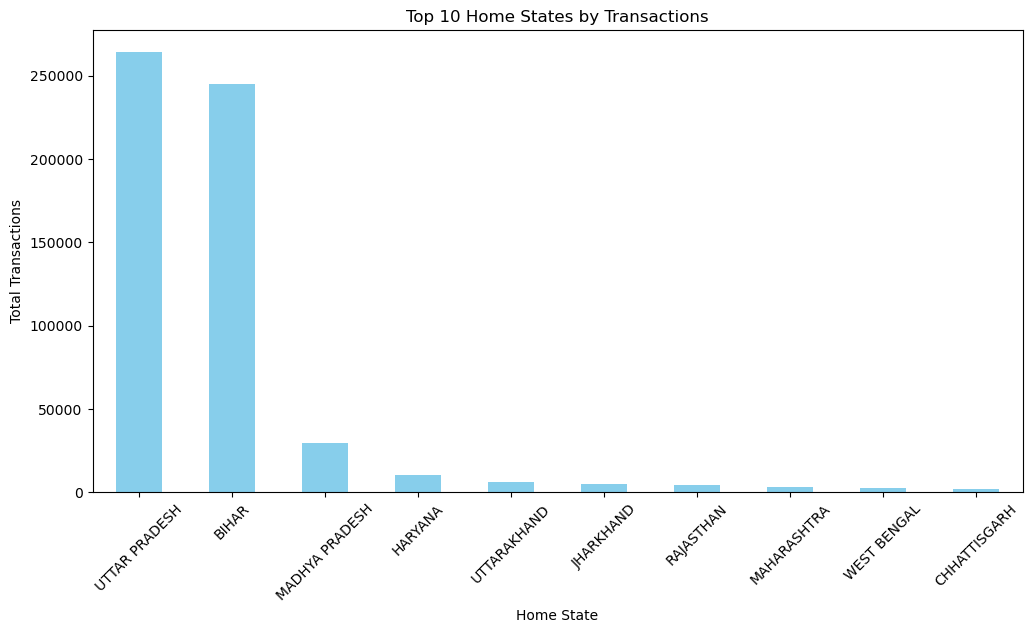

In [16]:
top_home_states = df.groupby('homestatename')['txn_count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_home_states.plot(kind='bar', color='skyblue')
plt.xlabel("Home State")
plt.ylabel("Total Transactions")
plt.title("Top 10 Home States by Transactions")
plt.xticks(rotation=45)
plt.show()



#  Bar Chart - Transactions from a Specific State

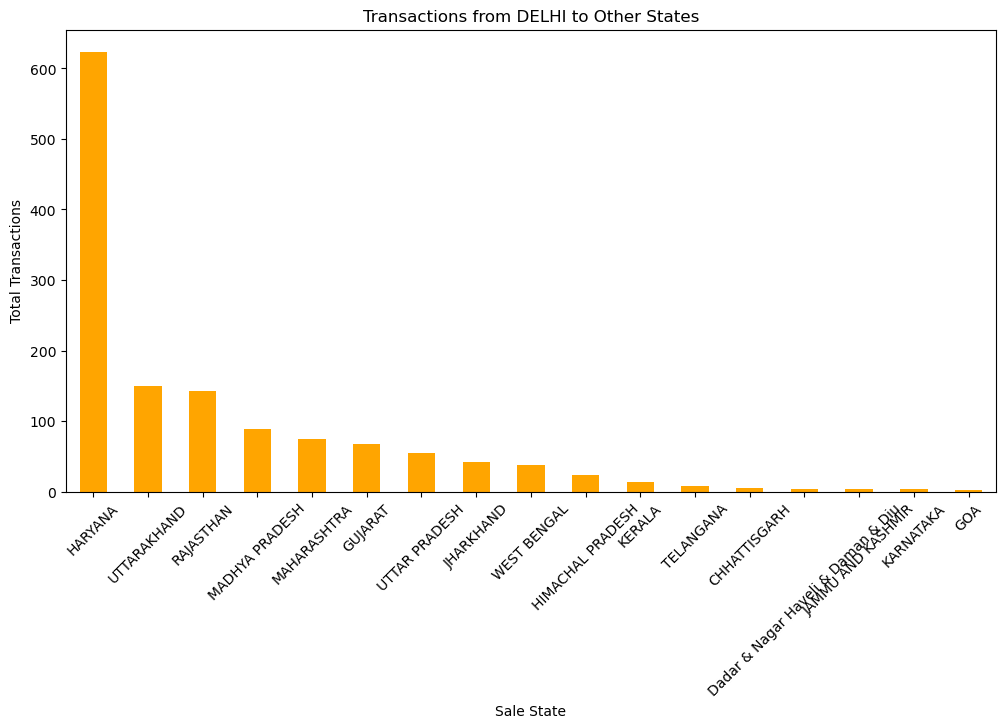

In [17]:
state_name = "DELHI"  # Change this to any state
state_data = df[df["homestatename"] == state_name].groupby("salestatename")["txn_count"].sum()

plt.figure(figsize=(12, 6))
state_data.sort_values(ascending=False).plot(kind="bar", color="orange")
plt.xlabel("Sale State")
plt.ylabel("Total Transactions")
plt.title(f"Transactions from {state_name} to Other States")
plt.xticks(rotation=45)
plt.show()


#  Pie Chart - Distribution of Transactions by Home State

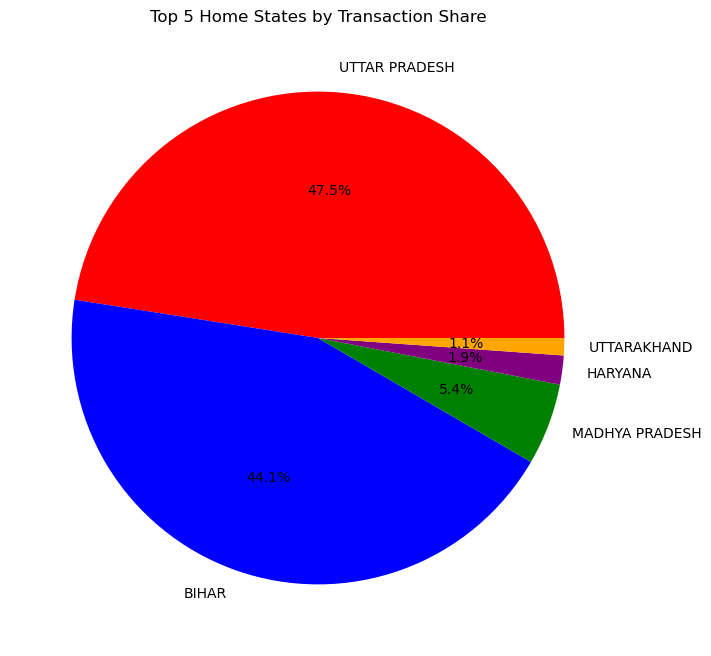

In [18]:
home_state_distribution = df.groupby("homestatename")["txn_count"].sum().nlargest(5)  # Top 5 states

plt.figure(figsize=(8, 8))
plt.pie(home_state_distribution, labels=home_state_distribution.index, autopct="%1.1f%%", colors=["red", "blue", "green", "purple", "orange"])
plt.title("Top 5 Home States by Transaction Share")
plt.show()


# Scatter Plot - Relationship Between Home and Sale State Transactions

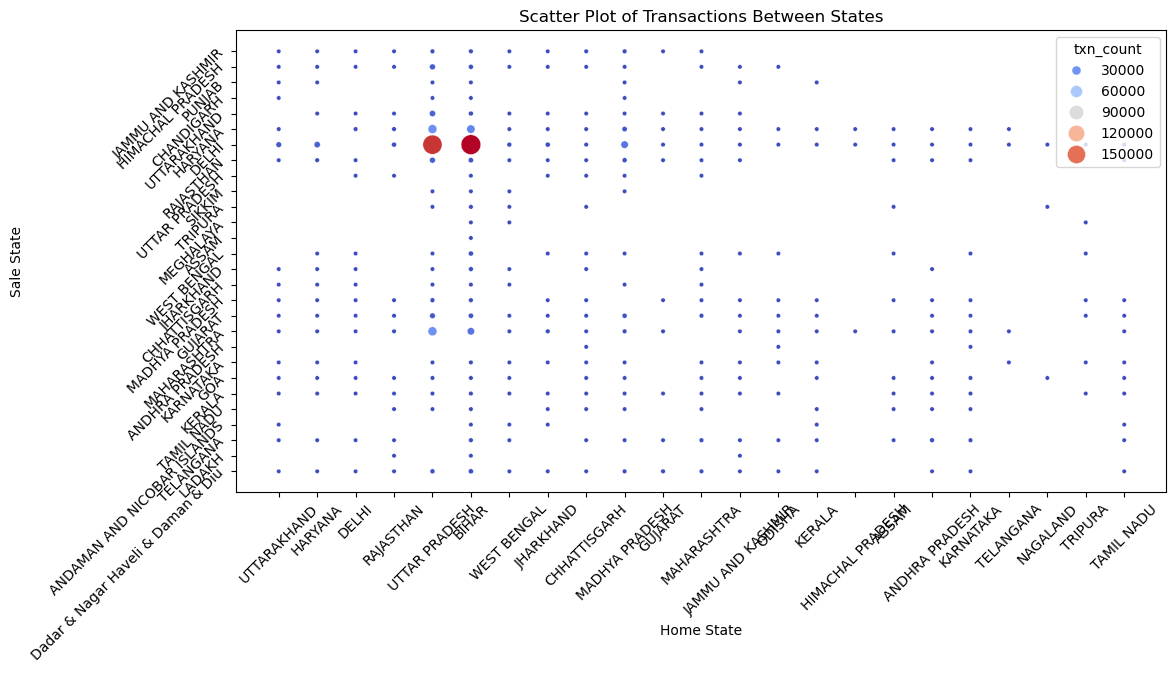

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="homestatename", y="salestatename", size="txn_count", hue="txn_count", palette="coolwarm", sizes=(10, 200))
plt.xlabel("Home State")
plt.ylabel("Sale State")
plt.title("Scatter Plot of Transactions Between States")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


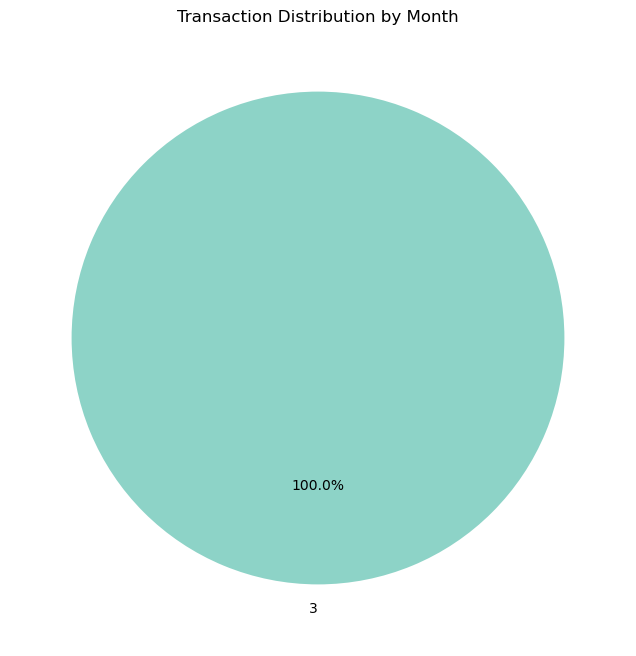

In [20]:
monthly_transactions = df.groupby('month')['txn_count'].sum()
plt.figure(figsize=(8, 8))
plt.pie(monthly_transactions, labels=monthly_transactions.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Transaction Distribution by Month")
plt.show()

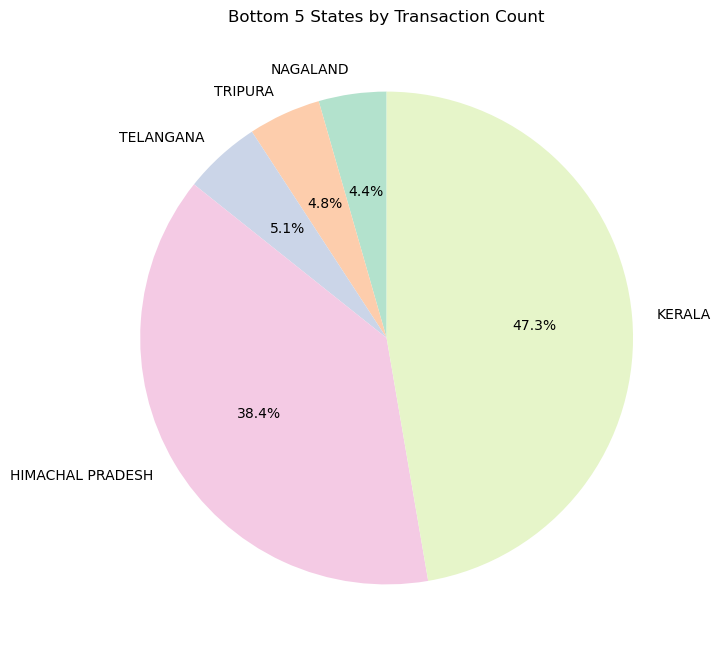

In [21]:
bottom_states = df.groupby('homestatename')['txn_count'].sum().nsmallest(5)
plt.figure(figsize=(8, 8))
plt.pie(bottom_states, labels=bottom_states.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title("Bottom 5 States by Transaction Count")
plt.show()

In [22]:
print(df.columns)


Index(['homestatecode', 'salestatecode', 'month', 'year', 'txn_count',
       'salestatename', 'homestatename'],
      dtype='object')


In [23]:
df.columns = df.columns.str.lower()  # Convert all column names to lowercase


In [24]:
df

,homestatecode,salestatecode,month,year,txn_count,salestatename,homestatename
0,5,1,3,2024,10,JAMMU AND KASHMIR,UTTARAKHAND
1,6,1,3,2024,38,JAMMU AND KASHMIR,HARYANA
2,7,1,3,2024,3,JAMMU AND KASHMIR,DELHI
3,8,1,3,2024,2,JAMMU AND KASHMIR,RAJASTHAN
4,9,1,3,2024,1231,JAMMU AND KASHMIR,UTTAR PRADESH
...,...,...,...,...,...,...,...
318,27,38,3,2024,506,Dadar & Nagar Haveli & Daman & Diu,MAHARASHTRA
319,28,38,3,2024,1,Dadar & Nagar Haveli & Daman & Diu,ANDHRA PRADESH
320,29,38,3,2024,3,Dadar & Nagar Haveli & Daman & Diu,KARNATAKA
321,32,38,3,2024,5,Dadar & Nagar Haveli & Daman & Diu,KERALA


C:\Users\bhara\AppData\Local\Temp\ipykernel_13236\1714798968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="homestatename", y="txn_count", palette="coolwarm")


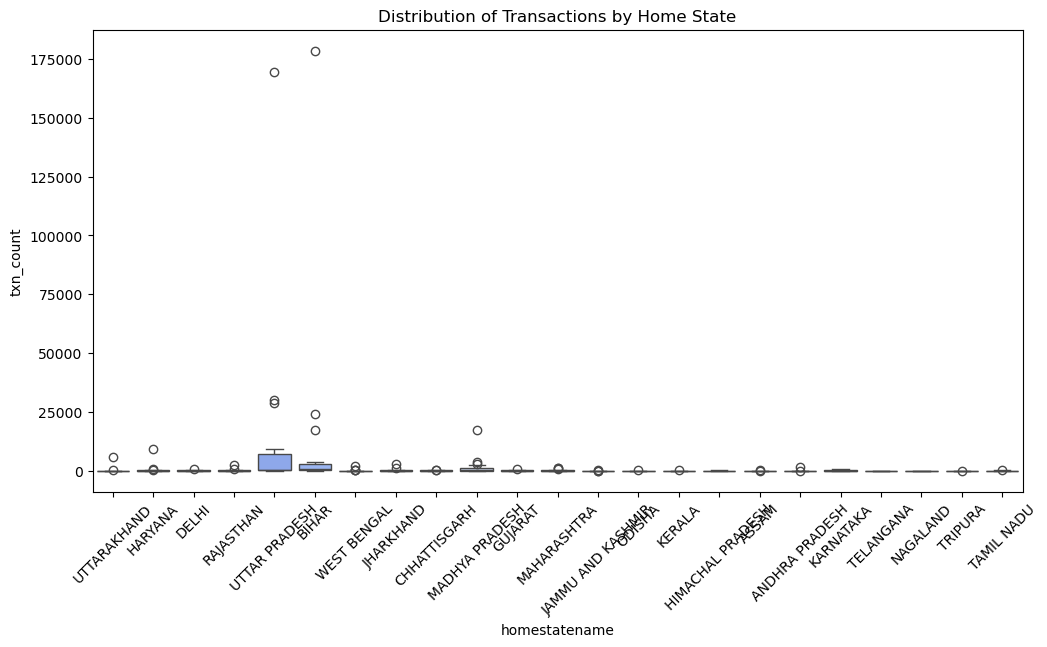

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="homestatename", y="txn_count", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Transactions by Home State")
plt.show()


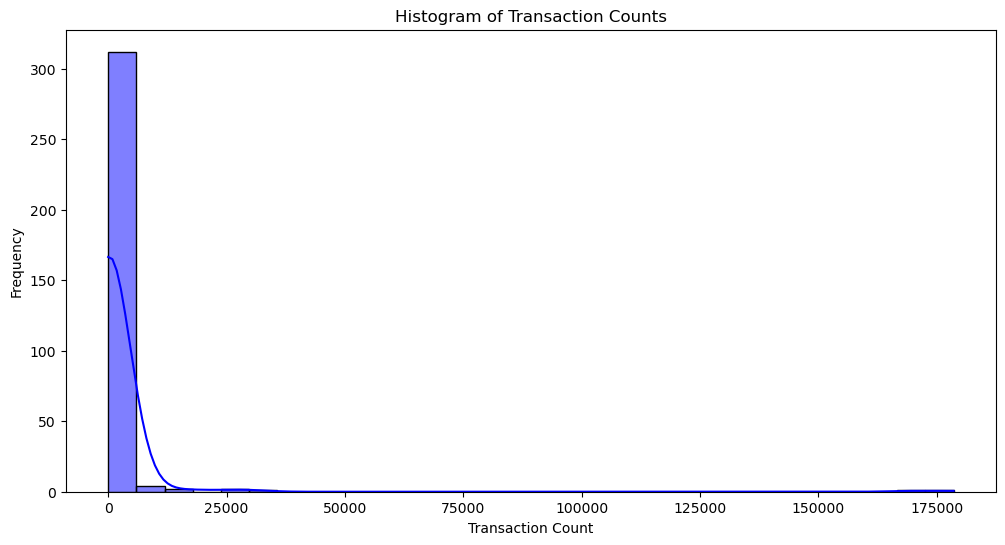

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df["txn_count"], bins=30, kde=True, color="blue")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.title("Histogram of Transaction Counts")
plt.show()


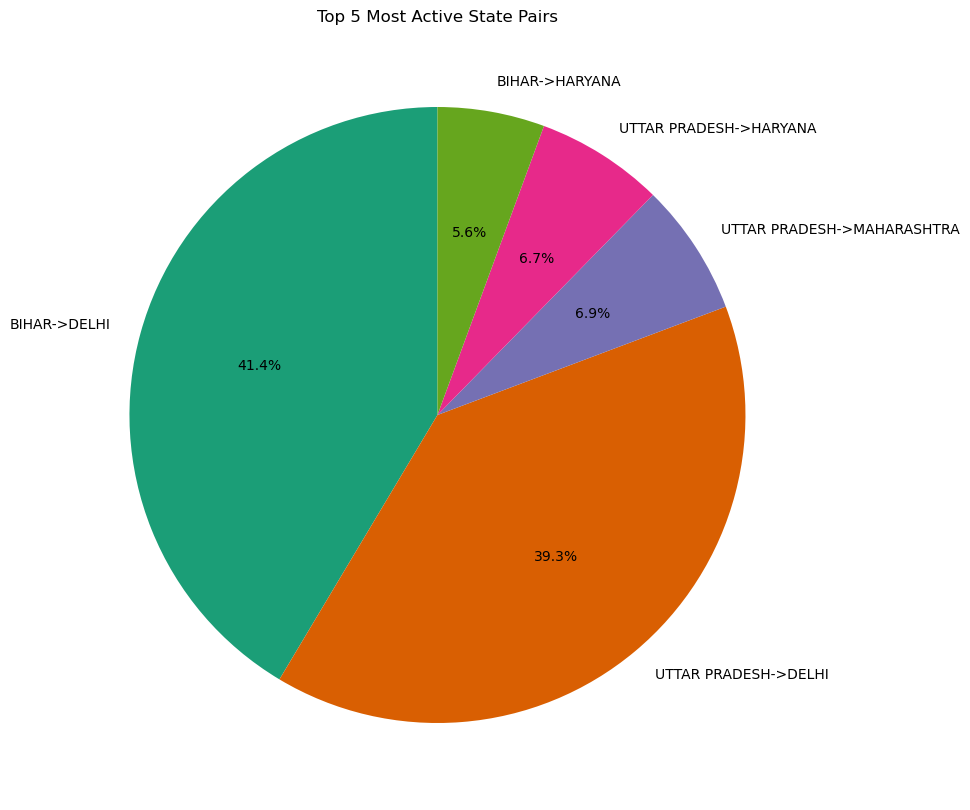

In [27]:
top_state_pairs = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().nlargest(5)
plt.figure(figsize=(10, 10))
plt.pie(top_state_pairs, labels=[f"{h}->{s}" for h, s in top_state_pairs.index], autopct='%1.1f%%', startangle=90, colors=plt.cm.Dark2.colors)
plt.title("Top 5 Most Active State Pairs")
plt.show()

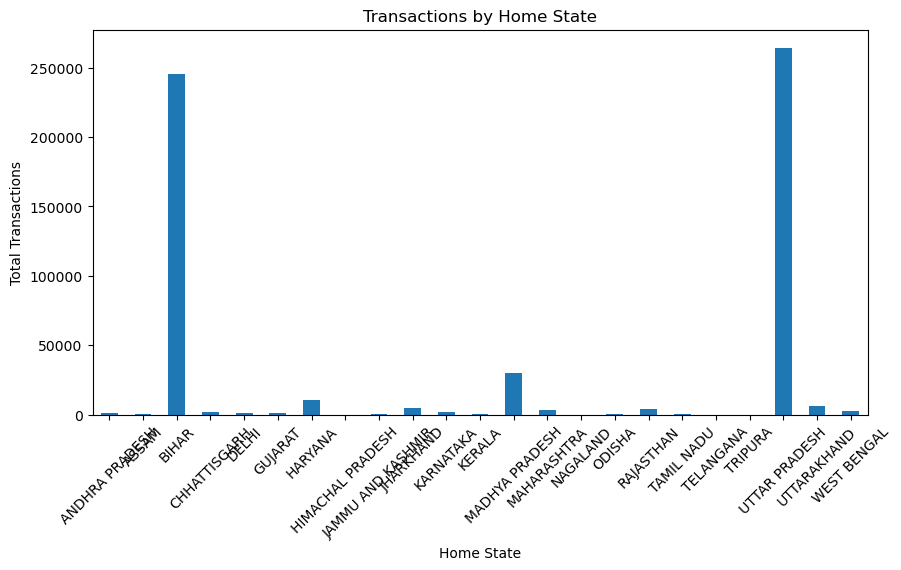

In [28]:
df.groupby('homestatename')['txn_count'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Home State")
plt.ylabel("Total Transactions")
plt.title("Transactions by Home State")
plt.xticks(rotation=45)
plt.show()


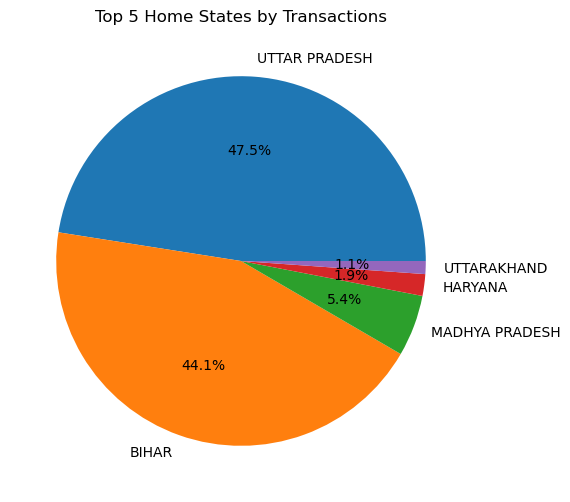

In [29]:
df.groupby("homestatename")["txn_count"].sum().nlargest(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Home States by Transactions")
plt.ylabel("")
plt.show()


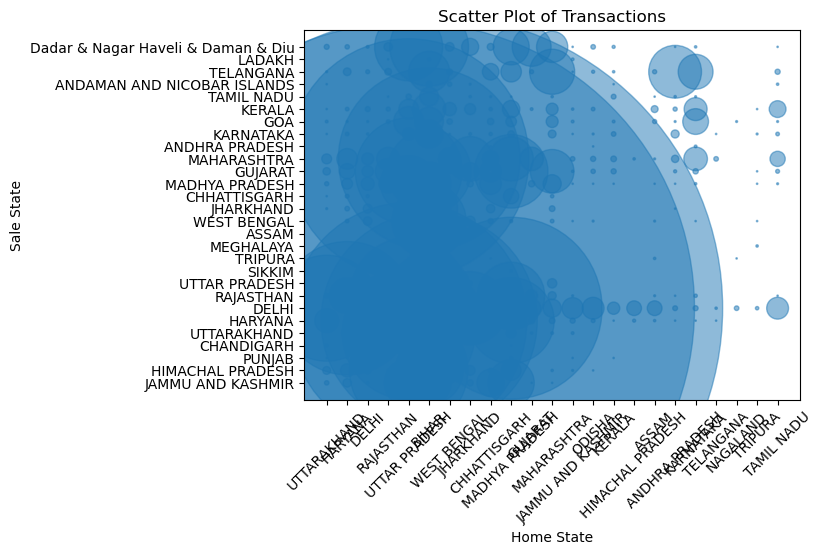

In [30]:
plt.scatter(df["homestatename"], df["salestatename"], s=df["txn_count"], alpha=0.5)
plt.xlabel("Home State")
plt.ylabel("Sale State")
plt.title("Scatter Plot of Transactions")
plt.xticks(rotation=45)
plt.show()


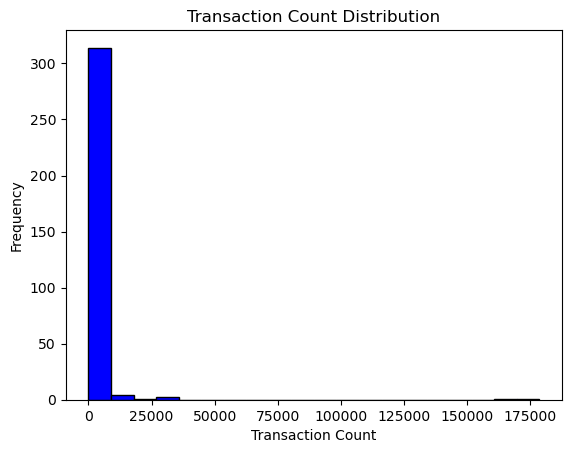

In [31]:
df["txn_count"].plot(kind="hist", bins=20, color="blue", edgecolor="black")
plt.xlabel("Transaction Count")
plt.ylabel("Frequency")
plt.title("Transaction Count Distribution")
plt.show()


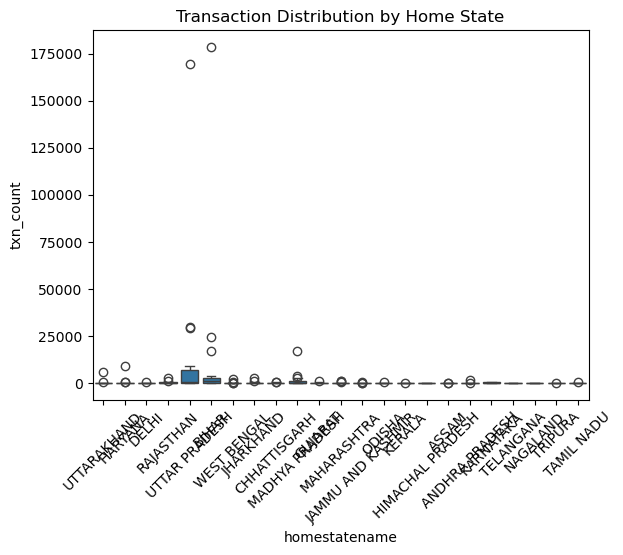

In [32]:
sns.boxplot(x="homestatename", y="txn_count", data=df)
plt.xticks(rotation=45)
plt.title("Transaction Distribution by Home State")
plt.show()

In [33]:
mean_txn = df["txn_count"].mean()
print("Mean Transaction Count:", mean_txn)

Mean Transaction Count: 1795.1517027863777


In [34]:
median_txn = df["txn_count"].median()
print("Median Transaction Count:", median_txn)


Median Transaction Count: 14.0


In [35]:
mode_txn = df["txn_count"].mode()[0]
print("Mode Transaction Count:", mode_txn)


Mode Transaction Count: 1


In [36]:
from scipy import stats  # Ensure you have imported stats from scipy

state1 = df[df["homestatename"] == "California"]["txn_count"]
state2 = df[df["homestatename"] == "Texas"]["txn_count"]

t_stat, p_value = stats.ttest_ind(state1, state2, nan_policy='omit')  # Fix the typo here
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: nan
P-Value: nan


In [37]:
pop_mean = df["txn_count"].mean()
sample = df[df["homestatename"] == "California"]["txn_count"]

t_stat, p_value = stats.ttest_1samp(sample, pop_mean, nan_policy='omit')
print("One-Sample T-Statistic:", t_stat)
print("One-Sample P-Value:", p_value)

One-Sample T-Statistic: nan
One-Sample P-Value: nan


C:\Users\bhara\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\bhara\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [38]:
print("\nOverall Transaction Count:", df['txn_count'].sum())


Overall Transaction Count: 579834


In [39]:
print("Average Transactions per State:", df.groupby('homestatename')['txn_count'].mean())

Average Transactions per State: homestatename
ANDHRA PRADESH         118.692308
ASSAM                   15.545455
BIHAR                 9074.851852
CHHATTISGARH            98.500000
DELHI                   78.941176
GUJARAT                137.600000
HARYANA                621.000000
HIMACHAL PRADESH        40.333333
JAMMU AND KASHMIR       17.875000
JHARKHAND              289.812500
KARNATAKA              122.153846
KERALA                  12.416667
MADHYA PRADESH        1489.600000
MAHARASHTRA            178.611111
NAGALAND                 4.666667
ODISHA                  25.833333
RAJASTHAN              285.333333
TAMIL NADU              50.363636
TELANGANA                4.000000
TRIPURA                  2.142857
UTTAR PRADESH        12575.571429
UTTARAKHAND            349.611111
WEST BENGAL            131.421053
Name: txn_count, dtype: float64


In [40]:
print("\nState with Maximum Transactions:", df.groupby('homestatename')['txn_count'].sum().idxmax())


State with Maximum Transactions: UTTAR PRADESH


In [41]:
print("State with Minimum Transactions:", df.groupby('homestatename')['txn_count'].sum().idxmin())

State with Minimum Transactions: NAGALAND


In [42]:
top_avg_states = df.groupby('homestatename')['txn_count'].mean().nlargest(5)
print("\nTop 5 States with Highest Average Transactions:\n", top_avg_states)


Top 5 States with Highest Average Transactions:
 homestatename
UTTAR PRADESH     12575.571429
BIHAR              9074.851852
MADHYA PRADESH     1489.600000
HARYANA             621.000000
UTTARAKHAND         349.611111
Name: txn_count, dtype: float64


In [43]:
state_mapping = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().reset_index()
print("\nHome State vs Sale State Transactions:\n", state_mapping.sort_values(by='txn_count', ascending=False).head(10))


Home State vs Sale State Transactions:
       homestatename     salestatename  txn_count
28            BIHAR             DELHI     178586
267   UTTAR PRADESH             DELHI     169401
278   UTTAR PRADESH       MAHARASHTRA      29935
271   UTTAR PRADESH           HARYANA      28945
32            BIHAR           HARYANA      24227
177  MADHYA PRADESH             DELHI      17147
40            BIHAR       MAHARASHTRA      17116
99          HARYANA             DELHI       9221
284   UTTAR PRADESH       UTTARAKHAND       9138
272   UTTAR PRADESH  HIMACHAL PRADESH       7278


In [44]:
top_state_pairs = df.groupby(['homestatename', 'salestatename'])['txn_count'].sum().nlargest(5)
print("\nTop 5 Home-Sale State Pairs:\n", top_state_pairs)


Top 5 Home-Sale State Pairs:
 homestatename  salestatename
BIHAR          DELHI            178586
UTTAR PRADESH  DELHI            169401
               MAHARASHTRA       29935
               HARYANA           28945
BIHAR          HARYANA           24227
Name: txn_count, dtype: int64


In [45]:
if 'year' in df.columns:
    yearly_transactions = df.groupby('year')['txn_count'].sum()
    print("\nYearly Transaction Distribution:\n", yearly_transactions)


Yearly Transaction Distribution:
 year
2024    579834
Name: txn_count, dtype: int64


In [46]:
total_transactions = df['txn_count'].sum()
state_percentages = (df.groupby('homestatename')['txn_count'].sum() / total_transactions) * 100
print("\nPercentage of Transactions Per Home State:\n", state_percentages.sort_values(ascending=False))


Percentage of Transactions Per Home State:
 homestatename
UTTAR PRADESH        45.545277
BIHAR                42.257094
MADHYA PRADESH        5.138022
HARYANA               1.820694
UTTARAKHAND           1.085311
JHARKHAND             0.799712
RAJASTHAN             0.738142
MAHARASHTRA           0.554469
WEST BENGAL           0.430640
CHHATTISGARH          0.339752
KARNATAKA             0.273871
ANDHRA PRADESH        0.266111
GUJARAT               0.237309
DELHI                 0.231446
TAMIL NADU            0.095545
ODISHA                0.053464
JAMMU AND KASHMIR     0.049324
ASSAM                 0.029491
KERALA                0.025697
HIMACHAL PRADESH      0.020868
TELANGANA             0.002759
TRIPURA               0.002587
NAGALAND              0.002414
Name: txn_count, dtype: float64


In [47]:
median_txn_per_state = df.groupby('homestatename')['txn_count'].median()
print("\nMedian Transactions Per Home State:\n", median_txn_per_state)


Median Transactions Per Home State:
 homestatename
ANDHRA PRADESH         3.0
ASSAM                  3.0
BIHAR                759.0
CHHATTISGARH          28.0
DELHI                 38.0
GUJARAT               21.0
HARYANA               31.0
HIMACHAL PRADESH       5.0
JAMMU AND KASHMIR      2.5
JHARKHAND             45.0
KARNATAKA              6.0
KERALA                 4.5
MADHYA PRADESH       140.0
MAHARASHTRA           33.5
NAGALAND               2.0
ODISHA                 6.0
RAJASTHAN              9.0
TAMIL NADU             7.0
TELANGANA              2.0
TRIPURA                1.0
UTTAR PRADESH        466.0
UTTARAKHAND            7.0
WEST BENGAL           10.0
Name: txn_count, dtype: float64


In [48]:
q1 = df['txn_count'].quantile(0.25)
q3 = df['txn_count'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['txn_count'] < (q1 - 1.5 * iqr)) | (df['txn_count'] > (q3 + 1.5 * iqr))]
print("\nOutliers in Transaction Count:\n", outliers)


Outliers in Transaction Count:
      homestatecode  salestatecode  month  year  txn_count  \
4                9              1      3  2024       1231   
5               10              1      3  2024       1005   
8               22              1      3  2024        389   
9               23              1      3  2024       1107   
17               9              2      3  2024       7278   
18              10              2      3  2024       2399   
40               9              5      3  2024       9138   
41              10              5      3  2024       1933   
51               7              6      3  2024        624   
52               8              6      3  2024        885   
53               9              6      3  2024      28945   
54              10              6      3  2024      24227   
60              23              6      3  2024       3839   
69               5              7      3  2024       5826   
70               6              7      3  2024      

In [49]:
state_variances = df.groupby('homestatename')['txn_count'].var()
consistent_states = state_variances.nsmallest(5)
print("\nTop 5 Most Consistent States (Low Variance in Transactions):\n", consistent_states)


Top 5 Most Consistent States (Low Variance in Transactions):
 homestatename
TRIPURA         3.476190
TELANGANA      22.666667
NAGALAND       30.333333
KERALA        472.265152
ASSAM        1115.672727
Name: txn_count, dtype: float64


In [50]:
print(df.columns)


Index(['homestatecode', 'salestatecode', 'month', 'year', 'txn_count',
       'salestatename', 'homestatename'],
      dtype='object')


In [51]:
from sklearn.model_selection import train_test_split


X = df.drop("target_column", axis=1) 
y = df["target_column"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


KeyError: "['target_column'] not found in axis"

In [52]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


NameError: name 'X_train' is not defined

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


NameError: name 'y_test' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Try Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Try Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

